#Acid Rain forecasting using Statistical Methods

*Acid rain has been a hazardous issue since a the start of industrial revolution in UK back in 1980. Ever since then many measures have been taken by the britsh government to over come this issue. Thus, forecasting the future trends is an essential step in bringing awarness among people and the government and encourage them to take necessary steps to overcome the problem. This project builds a time series based forecasting model to predict the acid rain emission trend over past 29 years.* 

*As a first step, all the necessary libraries are imported which would be used in the project for analysis.*

In [1]:
# import packages needed for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import VECM
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import grangercausalitytests
import plotly
import statsmodels.api as sm
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
%matplotlib inline
sm.tsa.statespace.SARIMAX
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Uni-variate Time series analysis

Three time series datasets are required for the analysis in this project. The following steps are executed to Load, clean and understand the datset. The acid rain dataset is loaded first, and any empty values in the dataset are checked.

In [2]:
df = pd.read_csv('/content/acidrain .csv')
df.head(5)

,Year,Agriculture,Mining,Manufacturing,Electricity,sewage,Construction,vehicles,Transport,Accommodation,Information and communication,Real estate activities,technical activities,Administrative activities,Total
0,1990,677.9,165.3,940.1,"3,035.60",36.0,84.1,78.2,901.3,7.7,6.4,2.7,11.7,17.5,6853
1,1991,674.2,158.4,955.4,"2,898.20",46.0,82.1,77.3,949.3,8.0,6.4,2.7,11.6,17.5,6779
2,1992,648.6,153.0,995.7,"2,746.70",46.9,81.3,75.3,900.2,7.8,6.3,2.7,11.4,17.3,6564
3,1993,635.3,170.2,959.6,"2,395.90",41.9,81.1,73.1,870.2,8.1,6.2,2.6,11.2,17.2,6118
4,1994,642.1,175.5,872.5,"2,216.70",37.4,82.9,72.4,858.4,7.6,6.1,2.6,11.0,17.1,5792


In [3]:
df.tail(5)

,Year,Agriculture,Mining,Manufacturing,Electricity,sewage,Construction,vehicles,Transport,Accommodation,Information and communication,Real estate activities,technical activities,Administrative activities,Total
26,2016,518.4,83.6,199.0,121.8,17.8,41.7,27.1,466.8,3.8,1.5,1.3,2.6,8.6,1726
27,2017,519.4,83.2,202.1,101.3,18.3,43.3,25.2,299.4,3.8,1.4,1.2,2.5,8.5,1543
28,2018,515.4,79.7,195.2,84,18.2,42.6,23.7,395.6,3.8,1.3,1.2,2.4,8.3,1608
29,2019,508.9,80.1,184.8,68,17.9,40.5,22.7,282.4,3.8,1.3,1.2,2.3,8.2,1461
30,2020,482.8,58.9,168.9,62.7,17.5,37.9,20.6,215.6,3.6,1.1,1.1,2.1,7.5,1292


In [4]:
df.shape

(31, 15)

In [5]:
df[['Year','Total']].isna().sum()
type(df.Year.iloc[0])

numpy.int64

In [6]:
type(df.Total.iloc[0])

numpy.int64

**Coal Production dataset**

The dataset is loaded into the pandas dataframe to perform the analysis.

In [7]:
df_coal = pd.read_csv('/content/coal production .csv')

In [8]:
df_coal.tail(5)

,year,output
26,2016,4
27,2017,3
28,2018,3
29,2019,3
30,2020,2


In [9]:
df_coal.shape

(31, 2)

In [9]:
df_coal.dtypes

year      int64
output    int64
dtype: object

**SO2 concentration dataset**

In [10]:
df_so2 = pd.read_csv('/content/so2data.csv')
df_so2.head(4)

,Year,Agriculture,Mining,Manufacturing,Water supply,Construction,Wholesale and retail,Transport,food services,Totalso2
0,1990,20.9,61.1,639.2,12.8,8.6,7.9,374.4,1.4,1126.3
1,1991,20.8,56.3,657.3,20.3,8.2,7.5,388.4,1.4,1160.2
2,1992,21.1,52.7,706.0,21.2,8.3,7.7,355.4,1.4,1173.8
3,1993,21.9,59.3,681.7,17.2,8.3,7.5,338.7,1.7,1136.3


In [11]:
df_so2[['Year']].isna().sum()

Year    0
dtype: int64

# Visualization

All the three datsets are visualised, for gaining initial insights into the trends.

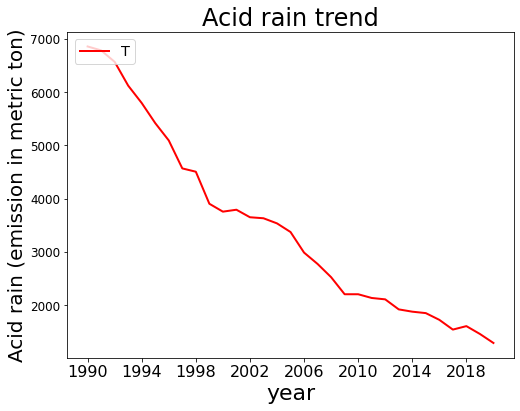

In [12]:
plt.figure(figsize=(8,6));
plt.plot(df.Year, df.Total, linewidth=2, color='Red');
plt.xticks(np.arange(1990,2020,4),fontsize=16);
plt.yticks(fontsize=12);
plt.xlabel('year',fontsize=22)
plt.ylabel('Acid rain (emission in metric ton)', fontsize=20)
plt.title('Acid rain trend', fontsize=24)
plt.legend(('Total acid rain (metric ton)'), loc='upper left', fontsize='x-large');

The acid rain plot shows a consistent downward trend.

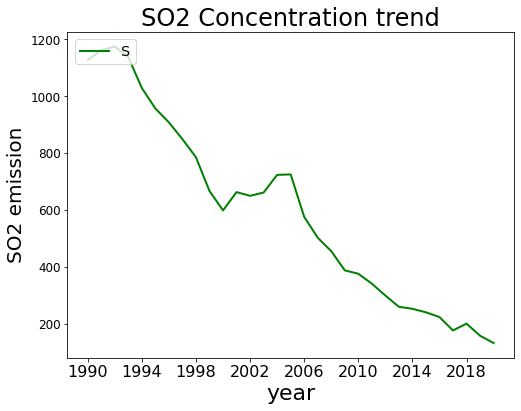

In [13]:
plt.figure(figsize=(8,6));
plt.plot(df_so2.Year, df_so2.Totalso2, linewidth=2, color='Green');
plt.xticks(np.arange(1990,2020,4),fontsize=16);
plt.yticks(fontsize=12);
plt.xlabel('year',fontsize=22)
plt.ylabel('SO2 emission', fontsize=20)
plt.title('SO2 Concentration trend', fontsize=24)
plt.legend(('SO2'), loc='upper left', fontsize='x-large');

The above plot depicts the SO2 emission trend since 1990. The plot shows a strict downward trend until 1998, followed a short term rise and then again dropping down consistently since 2006.

**Plotting both the Time series on a single graph**

In [14]:
df1= df[['Year', 'Total']].copy()
df2= df_so2[['Year', 'Totalso2']].copy()

In [15]:
df_combine = pd.merge(df1, df2, on='Year')
df_combine.head(3)

,Year,Total,Totalso2
0,1990,6853,1126.3
1,1991,6779,1160.2
2,1992,6564,1173.8


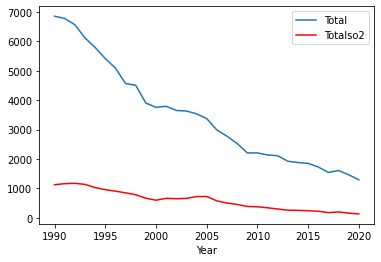

In [16]:
# gca stands for 'get current axis'
ax = plt.gca()

df_combine.plot(kind='line',x='Year',y='Total',ax=ax)
df_combine.plot(kind='line',x='Year',y='Totalso2', color='red', ax=ax)

plt.show()

Both the time series decline with time, as can be seen in the above figure, with acid rain pollution levels being quite high in 1990 and SO2 emissions being considerable higher than following years. This demonstrates that, in addition to so2, other pollutants contribute to higher acid rain pollution levels.

*Visualizing Coal production since 1990*

In [17]:
df_coal.head()

,year,output
0,1990,93
1,1991,94
2,1992,84
3,1993,68
4,1994,50


In [18]:
df_coal.columns

Index(['year', 'output'], dtype='object')

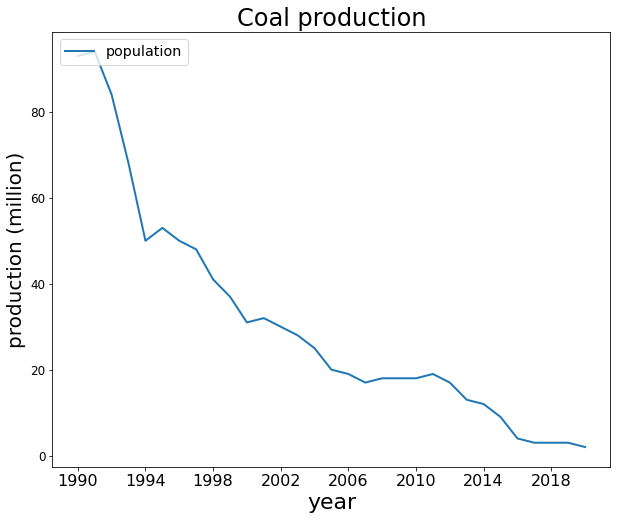

In [20]:
plt.figure(figsize=(10,8));
plt.plot(df_coal.year, df_coal.output, linewidth=2);
plt.xticks(np.arange(1990,2020,4),fontsize=16);
plt.yticks(fontsize=12);
plt.xlabel('year',fontsize=22)
plt.ylabel('production (million)', fontsize=20)
plt.title('Coal production', fontsize=24)
plt.legend(('population','urban population'), loc='upper left', fontsize='x-large');

#Data Preprocessing

The main focus of this experiment will be on total acid rain emissions per year. Preprocessing is done by constructing a new dataframe with the date and total acid emission values.

In [19]:
dfy= df[['Total']].copy()
conv_arr= dfy.values
arr = conv_arr.ravel()

In [20]:
dates_df = pd.read_csv('/content/dates.csv', parse_dates=True)
df6= dates_df.join(dfy)

In [21]:
df6.index = pd.to_datetime(df6['date'])
df6.drop(columns='date',inplace=True)

#Stationarity test (ADF)

Staionarity test a mandatory pre-requisite for training a ARIMA (Auto Regressive moving average model). The time series under evaluations needs to be stationary for carrying forward further analysis.

*We would implement the AUgument Dickey fuller's test (ADF), which is a form of Unit root test, used to check for the stationarity of the dataset. The test considers a Hypothesis, where the null hypothesis defines the series to be non- stationary and the Allternative hypothesis defines the series to be stationary. Provided the p-value obtained from the result is < than 0.05 (min value), the null hypothesis is rejected and the series is declared as stationary. The test will be conducted on the pre-processed acid rain dataset*



*   **H0** : The time series is non-stationary
*   **H1**: The time series is stationary. 




In [22]:
#perform dickey fuller to see if differenced data is stationary
def adfuller_test(Total):
    result=adfuller(Total)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

adfuller_test(df6['Total'])

ADF Test Statistic : -3.7696921020930207
p-value : 0.0032330794876723515
#Lags Used : 6
Number of Observations : 24


*The above results, gives a p- value of 0.003 which is less than 0.05 (critical value). Thus the null hypothesis can be rejected and the series is declared as Stationary. Let's check the plot of the series*

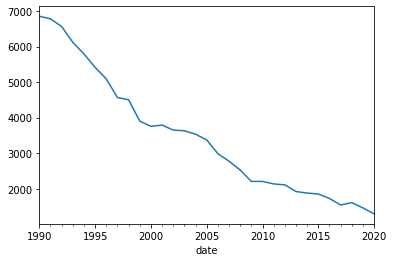

In [23]:
df6['Total'].plot()

*The plot shows a decreasing trend in the data, which visually dosen't make the data look stationary. For confirmation, that time series data can be divided into 2 halves to compute the mean and variance for both the halves. The below code demonstrates that. If the means and variance of both halves show significant difference that series can be concluded as non-stationary. Whereas, if there's no much difference in the mean and variance that series is stationary.*

In [24]:
series = df6['Total']
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4832.437500, mean2=2015.200000
variance1=1487020.371094, variance2=215595.093333


*The means and variance of both the halves show significant difference in the vlaues, which shows the series might be non-stationary. For safe side, first order differencing is done to make the data stationary in the code below.*

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [26]:
df6['First Difference'] = df6['Total'] - df6['Total'].shift(1)
df6.head(3)

,Total,First Difference
date,,
1990-01-31,6853,NaN
1991-01-31,6779,-74.0
1992-01-31,6564,-215.0


In [27]:
adfuller(df6['First Difference'].dropna())

(-1.5537065390976443,
 0.5067962111742013,
 6,
 23,
 {'1%': -3.7529275211638033,
  '10%': -2.6389669754253307,
  '5%': -2.998499866852963},
 249.62882802471026)

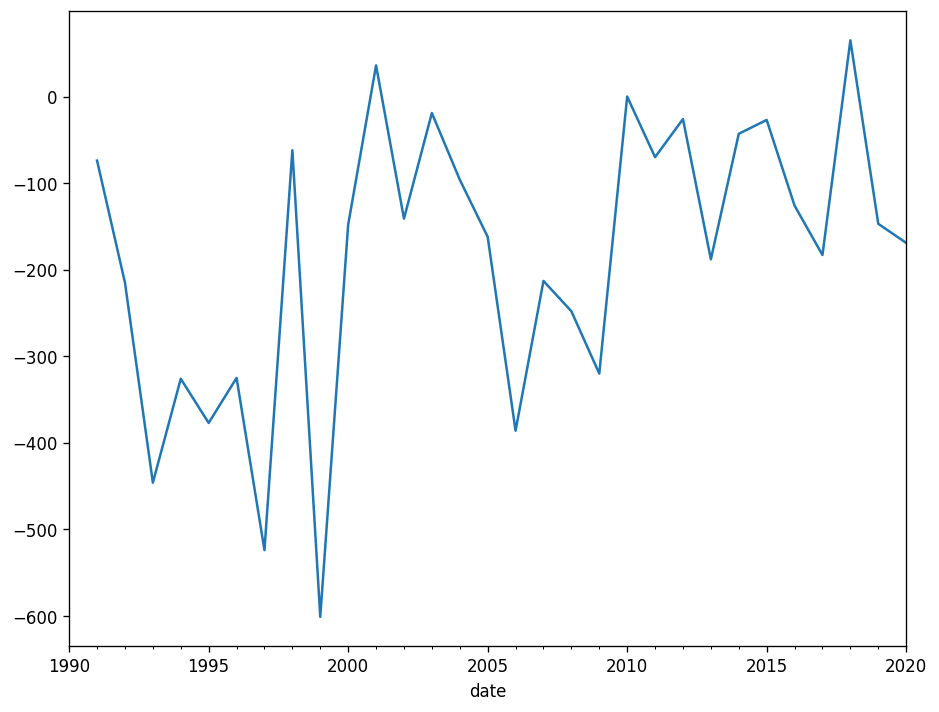

In [28]:
df6['First Difference'].plot()

*Since the differenced data shows unsatisfactory results, it wont be considered for further analysis.*

#ACF-PACF plots

*After converting the time series to a staionary time series dataset, the autocorrelatio and partial autocorrelation plots are computed to the order of the ARIMA model input. acf-pacf plot helps in discovering the AR, I and MA values.*

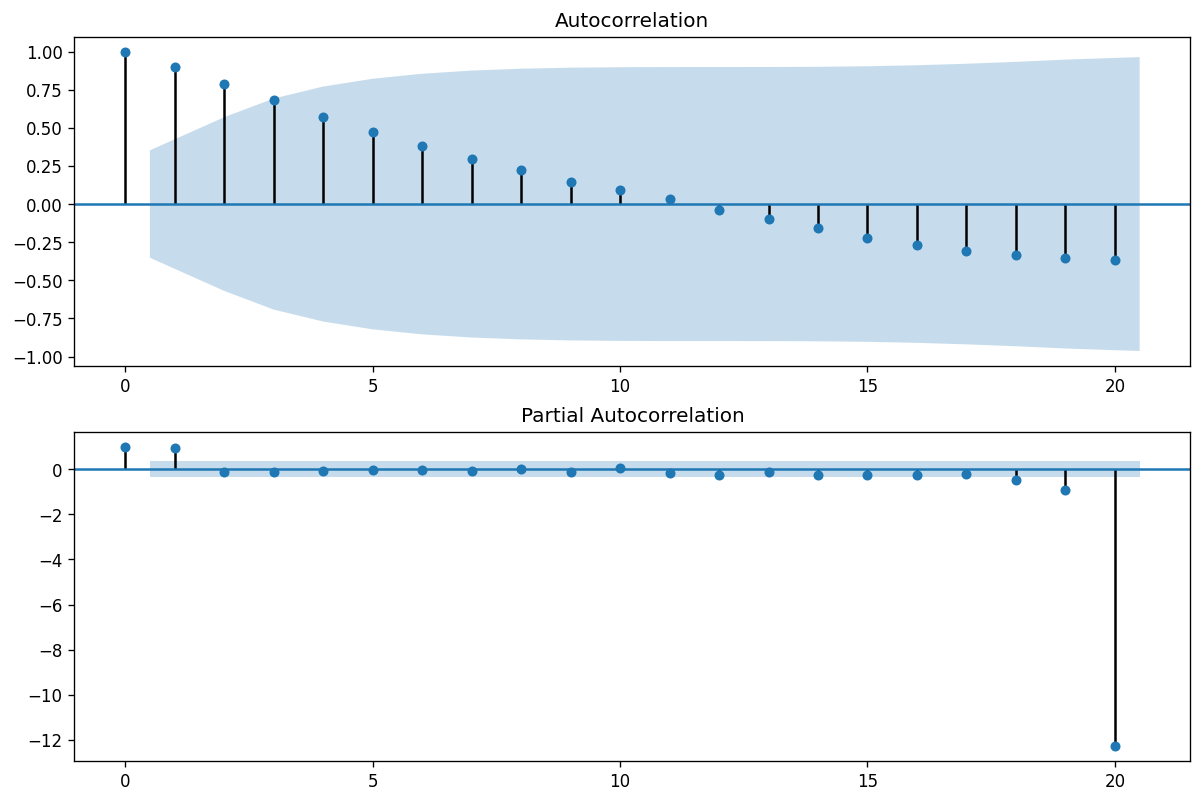

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df6['Total'].dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df6['Total'].dropna(),lags=20,ax=ax2)

*As shown by the PACF plot, lag 1 appears to be the most significant among the others, therefore the p values can be tentatively set at 1. observing the ACF plot, the q value is set to 1, since lag 1 crosses the significant region. Thus, the input values obtained are (1,1,1) or (1,1,0)*

*As a last step of pre processing we check for the seasonality component in our acid rain dataset.We perform seasonal decomposition on the dataset and obtain the plot as shown below:  *

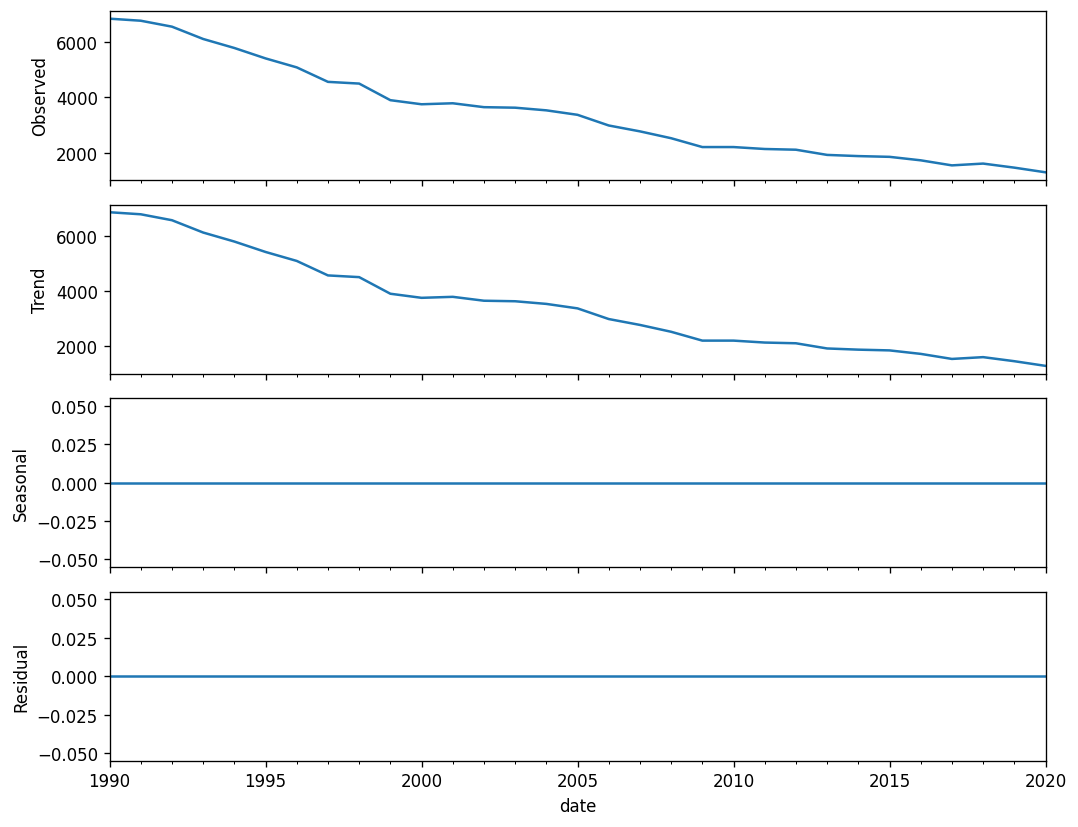

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df6['Total'], model="additive")
decompose_data.plot();

*The plot shows the seasonality component as a straight horizontal line, concluding that there is no seasonality present in the time series data under consideration.*

#Autoregressive Integrated Moving Average model (ARIMA)

*Using the input variables computed in the previous cells, the ARIMA is trained over the entire dataset to check the fit.*

In [31]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,0 ARIMA Model
model = ARIMA(df6['Total'], order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                   30
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -194.908
Method:                       css-mle   S.D. of innovations            160.366
Date:                Mon, 22 Nov 2021   AIC                            395.816
Time:                        01:16:11   BIC                            400.020
Sample:                    01-31-1991   HQIC                           397.161
                         - 01-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -184.4614     35.355     -5.217      0.000    -253.755    -115.168
ar.L1.D.Total     0.1774      0.178      0.997      0.327      -0.171       0.526
                                    Root

*The model summary reveals a lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms. The model AIC value obtained is 395.816. The P Values of the AR1 is 0.327 which is greater then 0.05 (min value) significant value.*

*Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).*

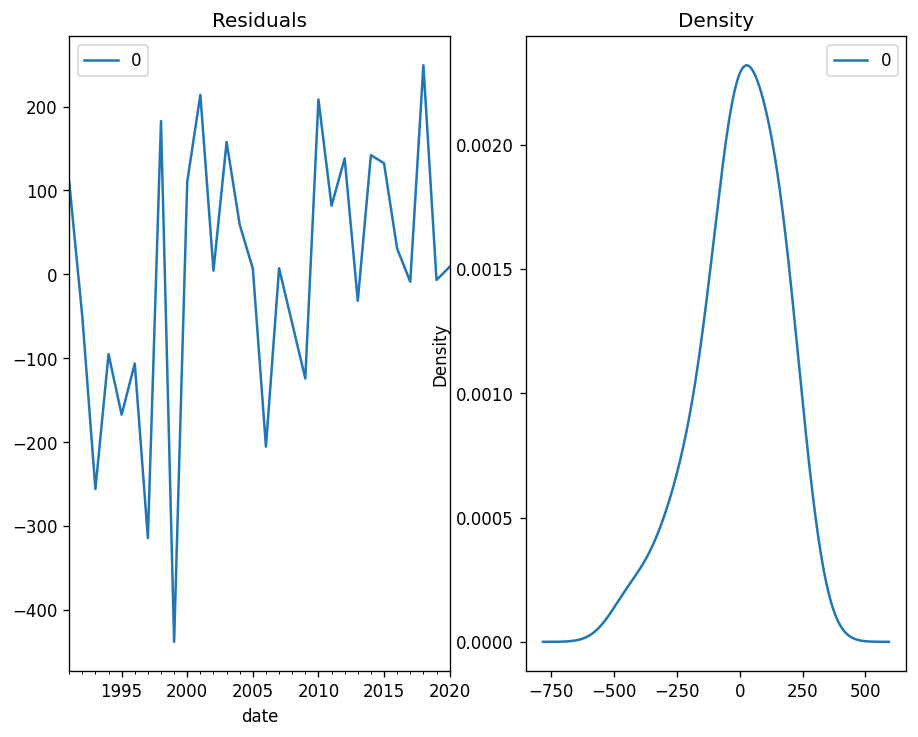

In [32]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

*The residual errors seem fine with near zero mean and uniform variance.*

Let's check the model fit, with increasing the differencing value to 2

In [35]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,0 ARIMA Model
model = ARIMA(df6['Total'], order=(1,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Total   No. Observations:                   29
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -190.814
Method:                       css-mle   S.D. of innovations            173.192
Date:                Mon, 22 Nov 2021   AIC                            387.628
Time:                        01:28:50   BIC                            391.730
Sample:                    01-31-1992   HQIC                           388.912
                         - 01-31-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2948     20.896     -0.062      0.951     -42.250      39.660
ar.L1.D2.Total    -0.5587      0.149     -3.757      0.001      -0.850      -0.267
                                    

The model produces better results with this input (1,2,0), with a reduced AIC value( 388) and the p value (0.001) < (0.05) being highly significant

Let’s plot the actuals against the fitted values using plot_predict().

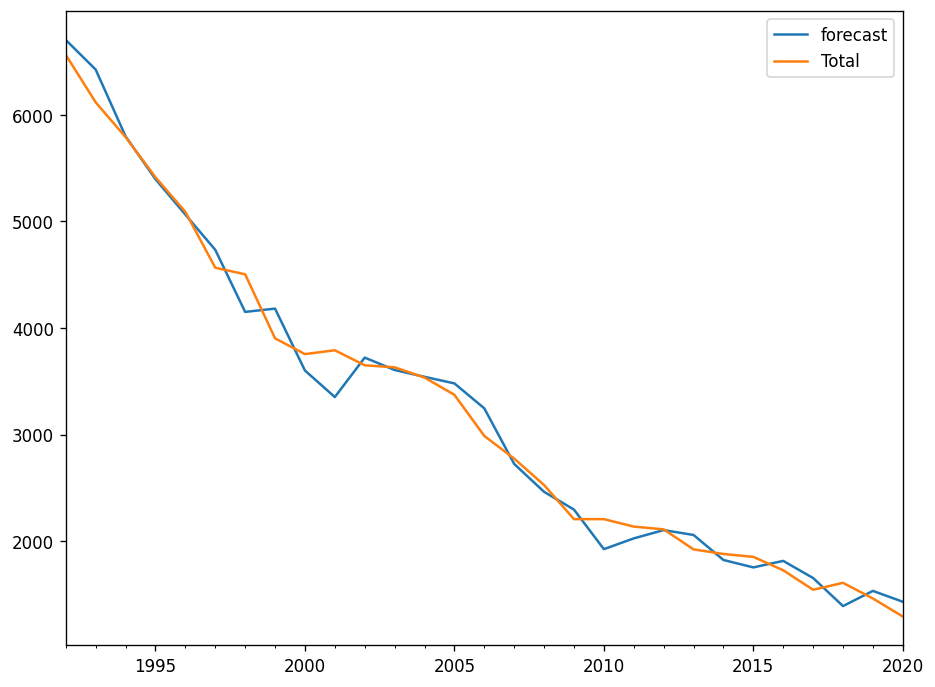

In [37]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

**Out of time Cross Validation**
*In Out-of-Time cross-validation, we take few steps back in time and forecast into the future to as many steps we took back. Then the forecast is compared agaisnt the actuals. To perform the cross validation the dataset is split into training and test series with a ratio of 80:20 respectively.*

In [39]:
# Create Training and Test
train = df6.Total[:25]
test = df6.Total[25:]

                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                   24
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -157.129
Method:                       css-mle   S.D. of innovations            168.643
Date:                Mon, 22 Nov 2021   AIC                            320.258
Time:                        04:38:21   BIC                            323.792
Sample:                    01-31-1991   HQIC                           321.196
                         - 01-31-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -205.5154     39.193     -5.244      0.000    -282.333    -128.698
ar.L1.D.Total     0.1238      0.205      0.603      0.553      -0.279       0.526
                                    Root

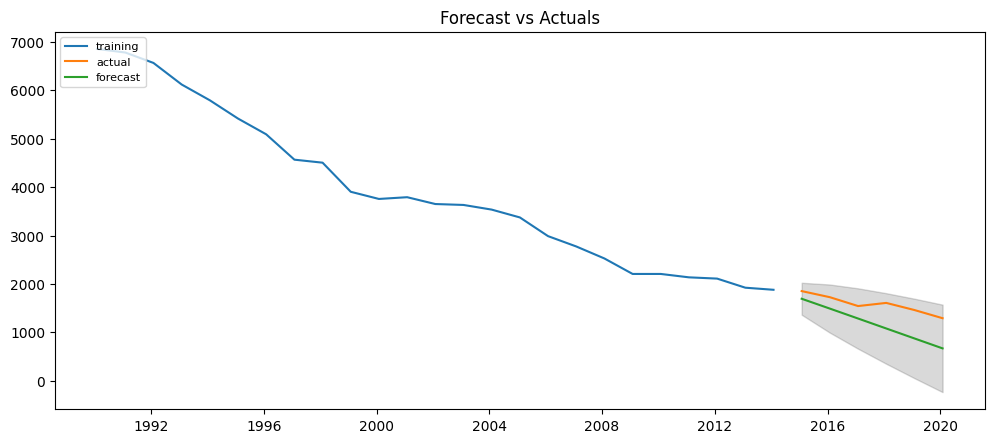

In [40]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model1 = ARIMA(train, order=(1, 1, 0))  
fitted = model1.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(6, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

*From the chart, the ARIMA(1,1,0) model seems to give a directionally downward forecast and the actual observed values lie within the 95% confidence band. But each of the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve. To accomplish this the differencing order d is changed to 2.*

                             ARIMA Model Results                              
Dep. Variable:               D2.Total   No. Observations:                   23
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -152.601
Method:                       css-mle   S.D. of innovations            182.571
Date:                Mon, 22 Nov 2021   AIC                            311.202
Time:                        04:38:28   BIC                            314.608
Sample:                    01-31-1992   HQIC                           312.058
                         - 01-31-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3268     24.558      0.054      0.957     -46.807      49.461
ar.L1.D2.Total    -0.5753      0.165     -3.497      0.002      -0.898      -0.253
                                    

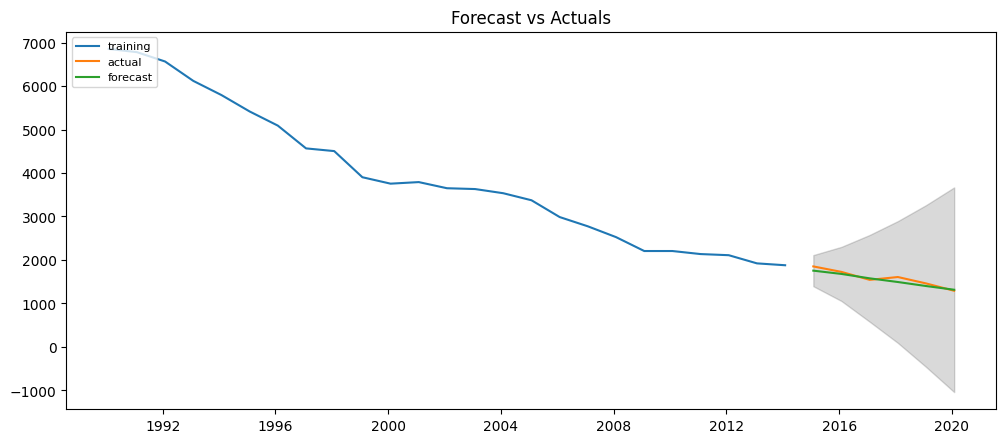

In [41]:
# Build Model
model1 = ARIMA(train, order=(1, 2, 0))  
fitted = model1.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(6, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

*As a result, The AIC has reduced to 311 from 320, which is a good sign. The P-values of the X terms are less the < 0.05, which is great.*

*The commonly used accuracy metrics to judge forecasts are given below:*

In [42]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

forecast_accuracy(fc, test.values)

{'corr': 0.956962254890191,
 'mae': 62.82086785383766,
 'mape': 0.03877995802118027,
 'me': -43.38920214720864,
 'mpe': -0.025197614106241283,
 'rmse': 70.89425429047924}

*As we can see, if we look at RMSE and MAE, the prediction is very accurate, since RMSE is only 67 compared to acid emission around 2345 metric ton.*

#Auto ARIMA

*Auto ARIMA is an extention of ARIMA model. It uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.*

In [43]:
dfy_train = df6.Total[:round(len(dfy)*0.8)]
dfy_test = df6.Total[round(len(dfy)*0.8):]

In [53]:
!pip install pmdarima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model2 = pm.auto_arima(dfy_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model2.summary())


     |████████████████████████████████| 1.4 MB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 16.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=314.459, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=318.622, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=312.829, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=316.623, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=314.313, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=316.263, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=310.831, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=312.313, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=312.460, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=311.277, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=314.263, Time=0.14 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.128 seconds
                           Statespace Model Results                           
Dep. Variable:           

*Best forecasting model obtained is ARIMA(1,2,0)(0,0,0)[0] .The AIC value obtained by this is model is 310, which is better compared to one obtained by ARIMA i.e 311. Now let's forecast the quality metrics*

In [54]:
m_auto_foca = model2.predict(6)
print('RMSE:', np.sqrt(mean_squared_error(dfy_test, m_auto_foca)))
print('MAE:', mean_absolute_error(dfy_test, m_auto_foca))

RMSE: 68.86515938320828
MAE: 60.91713655116197


*The rmse value obtained is 68 in this case, which is still fine when comared to the acid rain emission dataset range.*

**Residual plots**: Let’s review the residual plots using stepwise_fit. 

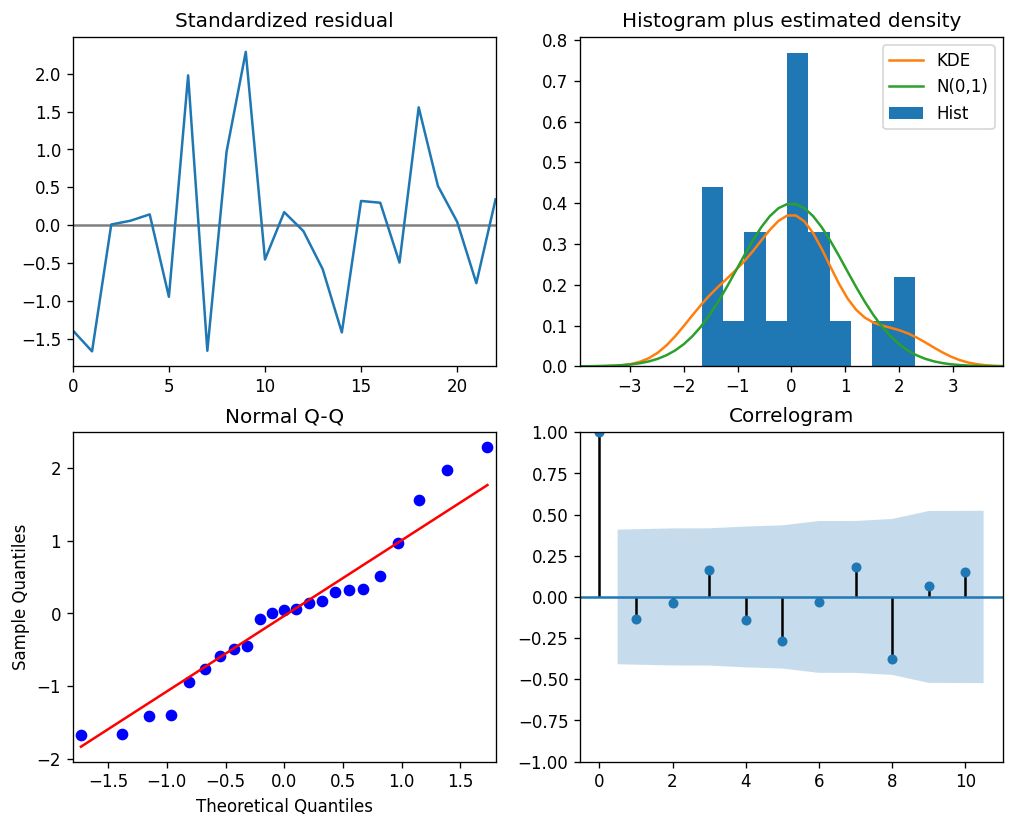

In [55]:
model2.plot_diagnostics(figsize=(10,8))
plt.show()

Interpretation of the following residual plots is given as follows: 

*   **Top left:** The residual errors seem to fluctuate around a mean of zero and have a non uniform variance.

* **Top Right:** The density plot suggest a right skewed distribution.

* **Bottom left:** All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed. As per the observation, the distribution is skewed.

* **Bottom Right**: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, the model seems a good fit to forecast.
  



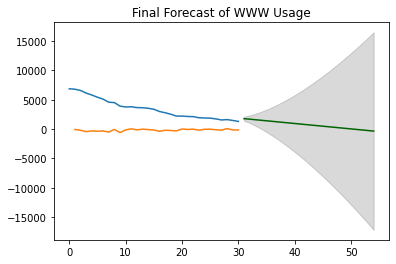

In [93]:
# Forecast
n_periods = 24
fc, confint = model2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df6.values), len(df6.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df6.values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()


#Multi-variate time series analysis

**Cointegration test**:  
*Cointegration is a technique used to find a possible correlation between Multiple times series variables. It helps, establish the presence of a statistically significant connection between two or more time series.  This is the basic premise on which Vector Autoregression(VAR) models is based on. So, it’s fairly common to implement the cointegration test before starting to build VAR models. Two series are said to be correlated if there exists a linear combination of them that has an order of integration (d) less than that of the individual series.*

The Hypothesis test is defined as follows:                                
**Ho**: there is no correlation(or cointegration) between acid rain and SO2

**Ha**: there is correlation between acid rain and SO2 

In [44]:
def cointest(y1, y2):
    results = ts.coint(y1, y2)
    print('t-statistic:', results[0])
    print('pvalue:', results[1])
    print('crit_value for 1%, 5% and 10%:', results[2])
cointest(dfy, df2)

t-statistic: -2.492167956256108
pvalue: 0.48800695363842783
crit_value for 1%, 5% and 10%: [-4.81004656 -4.03712141 -3.66345444]


*Since the test statistic value is greater than all the critical values, the null hypothesis is reject and the correlation exists*

**Johansen's Cointegration test**

*Johansen’s test is a way to determine if three or more time series are cointegrated. More specifically, it assesses the validity of a cointegrating relationship, using a maximum likelihood estimates (MLE) approach. It is also used to find the number of relationships and as a tool to estimating those relationships.*

In [45]:
df_tc = pd.DataFrame(index=dfy.index)
df_tc['acid_rain'], df_tc['so2'] = dfy['Total'], df2['Totalso2']

In [46]:
coint_johansen(df_tc,0,1).lr1

array([26.19479368,  5.37974537])

In [47]:
coint_johansen(df_tc,0,1).cvt

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [48]:
df_tp = pd.DataFrame(index=dfy.index)
df_tp['acid_rain'], df_tp['coal_production'] = dfy['Total'], df_coal.output.values

In [49]:
coint_johansen(df_tp,0,1).lr1

array([31.63367501,  8.6364618 ])

In [50]:
coint_johansen(df_tp,0,1).cvt

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

  **Granger Causality**:  
                                                *The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system.Using Granger’s Causality Test, it’s possible to test this relationship before even building the model. Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero. In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis. Below is the code implementation*

In [66]:
maxlag=9
# define the Granger Causality test function
def grangers_causation_matrix(data, variables, test3='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df3 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df3.columns:
        for r in df3.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test3][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df3.loc[r, c] = min_p_value
    df3.columns = [var + '_x' for var in variables]
    df3.index = [var + '_y' for var in variables]
    return df3
 

In [67]:
grangers_causation_matrix(data = df_tc, variables = df_tc.columns)

,acid_rain_x,so2_x
acid_rain_y,1.0,0.0184
so2_y,0.0,1.0000


*The row are the Response (Y) and the columns are the predictor series (X). Since 0.0184 is less than the citical value 0.05, SO2 causes acid_rain. But acid rain does not cause so2 emission.*

*Similarly, the test is applied onto all the three time series under consideratrion.*

In [70]:
df_tcr = pd.DataFrame(index=dfy.index)
df_tcr['acid_rain'], df_tcr['so2'], df_tcr['coal_production'] = dfy['Total'], df2['Totalso2'], df_coal['output']

In [71]:
grangers_causation_matrix(data = df_tcr, variables = df_tcr.columns)

,acid_rain_x,so2_x,coal_production_x
acid_rain_y,1.0,0.0184,0.0000
so2_y,0.0,1.0000,0.0011
coal_production_y,0.0,0.0000,1.0000


*Since the p value of coal production (0.0011) is less than 0.05, coal production causes acid rain. But there is no causal relationship between coal production and acid rain. To conclude from the above granger causality test => (so2 emission causes acid_rain) and (coal production causes so2 emission)* 

*Based on the above results, the Vector Autoregression model is used to forecast the influence of one time series over the other.*

#VAR model for SO2 emission and Acid rain

The following dataframe is created by using the join operation, to obtain all the so2 emission and acid rain data in one dataframe for the analysis.

In [51]:
df4 = dates_df.join(df_tc)

In [52]:
df4.dtypes

date          object
acid_rain      int64
so2          float64
dtype: object

*The data type of the date column is object and we need to change it to datetime. Also, for preparing the data, we need the index to have datetime.*

In [53]:
# convert the 'Date' column to datetime format
df4['date']= pd.to_datetime(df4['date'])
 
# Check the format of 'Date' column
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       31 non-null     datetime64[ns]
 1   acid_rain  31 non-null     int64         
 2   so2        31 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 872.0 bytes


In [54]:
data = df4.drop(['date'], axis=1)
data.index = df4.date

*The next step is to deal with the missing values. Since the missing values in the data are replaced with a value -200, we will have to impute the missing value with a better number. Consider this – if the present dew point value is missing, we can safely assume that it will be close to the value of the previous hour. Here, we would impute -200 with the previous value.*

*Along with this johansen's test is used to configure the stationarity of the time series.*

In [55]:
#missing value treatment
cols = data.columns
for j in cols:
    for i in range(0,len(data)):
       if data[j][i] == -200:
           data[j][i] = data[j][i-1]

#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = data
coint_johansen(johan_test_temp,-1,1).eig

array([0.65525685, 0.08324351])

*We will now go ahead and create the validation set to fit the model, and test the performance of the model:*

In [56]:
#creating the train and validation set
train1 = data[:int(0.8*(len(data)))]
valid1 = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train1)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid1))

*The predictions are in the form of an array, where each list represents the predictions of the row. We would transform this into a more presentable format.*

In [57]:
#converting predictions to dataframe

pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,2):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

for i in range(len(cols)):
    print('rmse value for', cols[i], 'is : ', np.sqrt(mean_squared_error(pred.iloc[i], valid1.iloc[i])))

rmse value for acid_rain is :  21.828347321025703
rmse value for so2 is :  28.411609788579202


*Fitting the model on the entire dataset gives the followung results:*

In [79]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[1252.32901364  125.7645153 ]]


In [63]:
valid1.dtypes

acid_rain      int64
so2          float64
dtype: object

In [64]:
pred.dtypes

acid_rain    object
so2          object
dtype: object

#VAR model for SO2 and Coal production

*Since, a positive causal relation was observed between coal production and so2 emission, we use the VAR model to compute the results for this pair of time series.*

The following dataframe is created by using the join operation, to obtain all the so2 emission and coal production data in one dataframe for the analysis.

In [82]:
df_cp = pd.DataFrame(index=df2.index)
df_cp['so2'], df_cp['coal_production'] = df2['Totalso2'], df_coal.output.values

In [83]:
df5= dates_df.join(df_cp)

In [84]:
# convert the 'Date' column to datetime format
df5['date']= pd.to_datetime(df5['date'])
 
# Check the format of 'Date' column
df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             31 non-null     datetime64[ns]
 1   so2              31 non-null     float64       
 2   coal_production  31 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 872.0 bytes


In [85]:
data1 = df5.drop(['date'], axis=1)
data1.index = df5.date

*Similar to the previous model evaluation, the missing values in the dataset are replaced with -200 and johansen's test is applied to check for stationarity. *

In [86]:
#missing value treatment
cols = data1.columns
for j in cols:
    for i in range(0,len(data)):
       if data1[j][i] == -200:
           data1[j][i] = data1[j][i-1]

#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = data1
coint_johansen(johan_test_temp,-1,1).eig

array([0.5710797 , 0.16663539])

*We will now go ahead and create the validation set to fit the model, and test the performance of the model:*

In [87]:
#creating the train and validation set
train2 = data1[:int(0.8*(len(data1)))]
valid2 = data1[int(0.8*(len(data1))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model3 = VAR(endog=train2)
model_fit = model3.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid2))

*The predictions are in the form of an array, where each list represents the predictions of the row. We would transform this into a more presentable format.*

In [88]:
#converting predictions to dataframe

pred1 = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,2):
    for i in range(0, len(prediction)):
       pred1.iloc[i][j] = prediction[i][j]

for i in range(len(cols)):
    print('rmse value for', cols[i], 'is : ', np.sqrt(mean_squared_error(pred1.iloc[i], valid2.iloc[i])))

rmse value for so2 is :  1.1003070470705614
rmse value for coal_production is :  7.199031973725093


In [89]:
#make final predictions
model = VAR(endog=data1)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[122.14842205   1.87998138]]


*From the rmse values obtained, it is observed that SO2 and acid rain, show a higher value of RMSE , in comparison to Coal production and SO2.*

#Conclusion

*The present work focuses on the time series analysis of acid rain occurance in United Kingdom based on ARIMA and VAR models. The univariate analysis has been carried out on acid rain emission values using ARIMA model and multivariate analysis has been performed on Acid rain emission, annual coal production and SO2 emission using VAR model. The performance of both the models has been depicted based on a number of metrics namely RMSE and MAE. As differenced data is used as an input to the prediction models, VAR model produces better forecasts than ARIMA model. From the results, it has been observed that for the prediction of acid rain, ARIMA produces RMSE of 68   compared to 21.823 for the VAR model respectively. Thus, the results produced by ARIMA model for acid rain prediction produces more error in comparison to the error produced by VAR model. Further, it has been found that the high error exists between the actual and predicted values of acid rain and SO2 when compared to SO2 and coal production data computed by the VAR model. Coal production shows strong correlations with Sulphur dioxide production, which can attributed to it’s chemical composition. Whereas, the correlation of SO2 with acid rain is not as strong as that with coal, which shows that Sulphur is not solely responsible for causing acid rain*.



